In [1]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from scipy import ndimage
from util import Unit
from util import populate_plt_settings, get_column_width, get_fig_size, get_latex_float

from matplotlib import pyplot as plt
import matplotlib

In [2]:
def calculate_masked_mse(v1, v2, mask):
    v_diff = v1 - v2
    masked_se = np.sum(v_diff * v_diff, axis=1) * mask
    num_masked = np.sum(mask)
    return np.sum(masked_se)/num_masked if num_masked>0 else 0

In [3]:
populate_plt_settings(plt)

In [17]:
def analyze_recon(recon_dir, filter_size=250):
    piv_dir = '/media/kennychufk/vol1bk0/'+recon_dir[6:recon_dir.find('2ssz4ihe')-1]
    h_start_pos = recon_dir.find('9000')+5
    real_h = recon_dir[h_start_pos:recon_dir.find('-',h_start_pos)]
    mask_hyphen_start_pos = recon_dir.find('-at')
    mask_postfix = ''
    if (mask_hyphen_start_pos>0):
        mask_start_pos = mask_hyphen_start_pos+3
        mask_size = recon_dir[mask_start_pos:recon_dir.find('-', mask_start_pos)]
        mask_postfix=f'-at{mask_size}'
    f_start_pos = recon_dir.find('-f')+2
    f_size = recon_dir[f_start_pos:f_start_pos+2]

    vel_piv= np.load(f'recon-results-2ssz4ihe/{recon_dir}/piv/truth_v_real.npy')[..., [2, 1]]
    vel_recon= np.load(f'recon-results-2ssz4ihe/{recon_dir}/piv/sim_v_real.npy')[..., [2, 1]]
    sim_errors = np.load(f'recon-results-2ssz4ihe/{recon_dir}/piv/sim_errors.npy')

    mask = np.load(f'{piv_dir}/mat_results/mask{mask_postfix}.npy').astype(bool)
    piv_freq = 500.0

    num_frames = len(vel_piv)
    num_samples = vel_piv.shape[1]
    vel_piv = vel_piv.reshape(num_frames, num_samples, 2)
    np.nan_to_num(vel_piv, copy=False)
    zero_vector = np.zeros_like(vel_piv[0])
    vel_recon = vel_recon.reshape(num_frames, num_samples, 2)
    mask = mask.reshape(num_frames, num_samples)

    mse_sum = 0
    v2_sum = 0
    mse_list = np.zeros(num_frames)
    v2_sim_list = np.zeros(num_frames)
    v2_list = np.zeros(num_frames)

    for frame_id in range(num_frames):
        mse = calculate_masked_mse(vel_recon[frame_id], vel_piv[frame_id], mask[frame_id])
        piv_v2 = calculate_masked_mse(zero_vector, vel_piv[frame_id], mask[frame_id])
        sim_v2 = calculate_masked_mse(zero_vector, vel_recon[frame_id], mask[frame_id])

        mse_sum += mse
        v2_sum += piv_v2
        mse_list[frame_id] = mse
        v2_list[frame_id] = piv_v2
        v2_sim_list[frame_id] = sim_v2
    score = -mse_sum/v2_sum
    print(real_h, f_size, mask_postfix, score, np.load(f'recon-results-2ssz4ihe/{recon_dir}/piv/score.npy'))

    mse_filtered = ndimage.uniform_filter(mse_list, size=filter_size, mode='mirror')
    v2_filtered = ndimage.uniform_filter(v2_list, size=filter_size, mode='mirror')
    score_filtered = - mse_filtered/v2_filtered
    v2_sim_filtered = ndimage.uniform_filter(v2_sim_list, size=filter_size, mode='mirror')
    
    return score, score_filtered, v2_filtered, v2_sim_filtered

In [5]:
recon_dirs2 = ["recon-20210415_162749-laser-too-high-wr518z6d-9000-0.0125-at0.0424264-f18-07c87905/"
        ,"recon-20210416_101435-wr518z6d-9000-0.0125-at0.0424264-f18-7d4defe0/"
        ,"recon-20210416_102548-wr518z6d-9000-0.0125-at0.0424264-f18-68439e53/"
        ,"recon-20210416_103739-wr518z6d-9000-0.0125-at0.0424264-f18-a17bc755/"
        ,"recon-20210416_104936-wr518z6d-9000-0.0125-at0.0424264-f18-4db9e783/"
        ,"recon-20210416_120534-wr518z6d-9000-0.0125-at0.0424264-f18-4c6b7a6b/"
        ,"recon-20210415_162749-laser-too-high-wr518z6d-9000-0.0125-at0.0424264-f16-95fce6d9/"
        ,"recon-20210416_101435-wr518z6d-9000-0.0125-at0.0424264-f16-9ad9b5f4/"
        ,"recon-20210416_102548-wr518z6d-9000-0.0125-at0.0424264-f16-e8e4fb33/"
        ,"recon-20210416_103739-wr518z6d-9000-0.0125-at0.0424264-f16-32c98e5f/"
        ,"recon-20210416_104936-wr518z6d-9000-0.0125-at0.0424264-f16-feeb2a0d/"
        ,"recon-20210416_120534-wr518z6d-9000-0.0125-at0.0424264-f16-74003018/"
        ,"recon-20210415_162749-laser-too-high-wr518z6d-9000-0.0125-at0.0424264-f14-ef9598c7/"
        ,"recon-20210416_101435-wr518z6d-9000-0.0125-at0.0424264-f14-595e6a94/"
        ,"recon-20210416_102548-wr518z6d-9000-0.0125-at0.0424264-f14-cc6a6476/"
        ,"recon-20210416_103739-wr518z6d-9000-0.0125-at0.0424264-f14-63007bc3/"
        ,"recon-20210416_104936-wr518z6d-9000-0.0125-at0.0424264-f14-1b0d07b3/"
        ,"recon-20210416_120534-wr518z6d-9000-0.0125-at0.0424264-f14-60b67d6d/"]

In [ ]:
#0.0125, f18
results = [analyze_recon(recon_dirs2[recon_dir_id]) for recon_dir_id in range(6)]

In [ ]:
#0.0125, f16
results = [analyze_recon(recon_dirs2[recon_dir_id]) for recon_dir_id in range(6, 12)]

In [ ]:
#0.0125, f14
results = [analyze_recon(recon_dirs2[recon_dir_id]) for recon_dir_id in range(12, 18)]

In [6]:
recon_dirs3 = [
    "recon-20210415_162749-laser-too-high-wr518z6d-9000-0.011-at0.0424264-f18-9f540928/",
    "recon-20210416_101435-wr518z6d-9000-0.011-at0.0424264-f18-ba6216bb/",
    "recon-20210416_102548-wr518z6d-9000-0.011-at0.0424264-f18-9a02b02f/",
    "recon-20210416_103739-wr518z6d-9000-0.011-at0.0424264-f18-6232963a/",
    "recon-20210416_104936-wr518z6d-9000-0.011-at0.0424264-f18-8a0fc3b1/",
    "recon-20210416_120534-wr518z6d-9000-0.011-at0.0424264-f18-f0584315/",
    "recon-20210415_162749-laser-too-high-wr518z6d-9000-0.011-at0.0424264-f16-93333ea0/",
    "recon-20210416_101435-wr518z6d-9000-0.011-at0.0424264-f16-125d6821/",
    "recon-20210416_102548-wr518z6d-9000-0.011-at0.0424264-f16-c09b4524/",
    "recon-20210416_103739-wr518z6d-9000-0.011-at0.0424264-f16-643545d9/",
    "recon-20210416_104936-wr518z6d-9000-0.011-at0.0424264-f16-18218ef8/",
    "recon-20210416_120534-wr518z6d-9000-0.011-at0.0424264-f16-35be825f/",
    "recon-20210415_162749-laser-too-high-wr518z6d-9000-0.011-at0.0424264-f14-2ac13fc3/",
    "recon-20210416_101435-wr518z6d-9000-0.011-at0.0424264-f14-da86a44c/",
    "recon-20210416_102548-wr518z6d-9000-0.011-at0.0424264-f14-9c0a1d64/",
    "recon-20210416_103739-wr518z6d-9000-0.011-at0.0424264-f14-210b2376/",
    "recon-20210416_104936-wr518z6d-9000-0.011-at0.0424264-f14-3982f2ff/",
    "recon-20210416_120534-wr518z6d-9000-0.011-at0.0424264-f14-7ba843d5/"
]

In [7]:
#0.011, f18
results = [analyze_recon(recon_dirs3[recon_dir_id]) for recon_dir_id in range(6)]

0.011 18 -at0.0424264 -0.8212301631055496 -0.8212280209455045
0.011 18 -at0.0424264 -0.562673697425452 -0.5626735671933767
0.011 18 -at0.0424264 -0.5976653938177908 -0.5976652327228227
0.011 18 -at0.0424264 -0.5413444890987816 -0.5413443710596662
0.011 18 -at0.0424264 -0.6026220890718802 -0.6026218706895791
0.011 18 -at0.0424264 -0.5778245813416895 -0.5778206999605239


In [8]:
#0.011, f16
results = [analyze_recon(recon_dirs3[recon_dir_id]) for recon_dir_id in range(6, 12)]

0.011 16 -at0.0424264 -0.8380215937868001 -0.8380196524653485
0.011 16 -at0.0424264 -0.575175067483337 -0.5751749410123458
0.011 16 -at0.0424264 -0.6051407190704577 -0.605140562058442
0.011 16 -at0.0424264 -0.5595466232193286 -0.5595465104197666
0.011 16 -at0.0424264 -0.6207014586827069 -0.620701250254647
0.011 16 -at0.0424264 -0.5592093176053575 -0.5592052630281077


In [9]:
#0.0125, f14
results = [analyze_recon(recon_dirs3[recon_dir_id]) for recon_dir_id in range(12, 18)]

0.011 14 -at0.0424264 -0.81849142289151 -0.818489248415466
0.011 14 -at0.0424264 -0.5680654592622669 -0.5680653309723777
0.011 14 -at0.0424264 -0.5760659824684843 -0.5760658134806771
0.011 14 -at0.0424264 -0.5648621902096068 -0.5648620776964709
0.011 14 -at0.0424264 -0.6307394261538022 -0.6307392234145781
0.011 14 -at0.0424264 -0.5686964094005731 -0.568692443376544


In [10]:
selected_diagonal_dir = "recon-20210416_103739-wr518z6d-9000-0.011-at0.0424264-f18-6232963a/"
score, score_filtered, v2_filtered, v2_sim_filtered = analyze_recon(selected_diagonal_dir, filter_size=200)

0.011 18 -at0.0424264 -0.5413444890987816 -0.5413443710596662


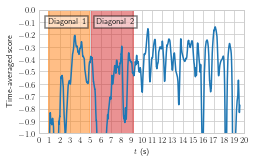

In [11]:
num_rows = 1
num_cols = 1
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(num_rows, num_cols, figsize = get_fig_size(get_column_width()))
cmap = plt.get_cmap("tab10")

piv_freq = 500
ts = np.arange(len(score_filtered)) / piv_freq
ax.plot(ts, score_filtered)
ax.set_xlabel(r'$t$ (s)')
ax.set_ylim(-1, 0)
ax.set_ylabel(r"Time-averaged score")
ax.set_xlim(0, 20)

fig.tight_layout(pad=0.05) # pad is 1.08 by default https://stackoverflow.com/a/59252633

ax.axvspan(0.833, 4.85, color=cmap(1), alpha=0.5)
ax.axvspan(5.083, 9.1, color=cmap(3), alpha=0.5)
ax.annotate("Diagonal 1", xy=(2.7, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))

ax.annotate("Diagonal 2", xy=(7.4, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))
ax.xaxis.set_ticks(np.arange(0, 20.5, 1))
ax.yaxis.set_ticks(np.arange(-1, 0.05, 0.1))
# fig.savefig('linear-stir-two-diagonals-time-score.pgf', bbox_inches='tight') # bbox_inches='tight' necessary for keeping the time legend inside the canvas

In [20]:
recon_dirs3 = [
    "recon-20210415_162749-laser-too-high-2ssz4ihe-27500-0.011-at0.0424264-f18-7ebedae3/",
    "recon-20210416_101435-2ssz4ihe-27500-0.011-at0.0424264-f18-57fe5df4/",
    "recon-20210416_102548-2ssz4ihe-27500-0.011-at0.0424264-f18-1a47e6c8/",
    "recon-20210416_103739-2ssz4ihe-27500-0.011-at0.0424264-f18-12aa1f7f/",
    "recon-20210416_104936-2ssz4ihe-27500-0.011-at0.0424264-f18-61ddf90c/",
    "recon-20210416_114327-2ssz4ihe-27500-0.011-at0.0424264-f18-c13d74e4/",
    "recon-20210416_115523-2ssz4ihe-27500-0.011-at0.0424264-f18-e0a9e0c3/",
    "recon-20210416_120534-2ssz4ihe-27500-0.011-at0.0424264-f18-c712c120/"
]

In [21]:
#0.011, f18
results = [analyze_recon(recon_dirs3[recon_dir_id]) for recon_dir_id in range(6)]

n 18 -at0.0424264 -0.9289381914444567 -0.9289373380863873
n 18 -at0.0424264 -0.880904912857465 -0.8809048770519432
n 18 -at0.0424264 -0.7370856582037125 -0.7370855547037765
n 18 -at0.0424264 -0.8503556556065452 -0.850355617943955
n 18 -at0.0424264 -0.7761726038991398 -0.7761724810733109
n 18 -at0.0424264 -0.951760814164328 -0.9517607732424864


In [22]:
selected_diagonal_dir = "recon-20210416_103739-2ssz4ihe-27500-0.011-at0.0424264-f18-12aa1f7f/"
score, score_filtered, v2_filtered, v2_sim_filtered = analyze_recon(selected_diagonal_dir, filter_size=200)

n 18 -at0.0424264 -0.8503556556065452 -0.850355617943955


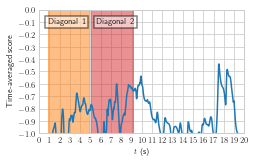

In [23]:
num_rows = 1
num_cols = 1
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(num_rows, num_cols, figsize = get_fig_size(get_column_width()))
cmap = plt.get_cmap("tab10")

piv_freq = 500
ts = np.arange(len(score_filtered)) / piv_freq
ax.plot(ts, score_filtered)
ax.set_xlabel(r'$t$ (s)')
ax.set_ylim(-1, 0)
ax.set_ylabel(r"Time-averaged score")
ax.set_xlim(0, 20)

fig.tight_layout(pad=0.05) # pad is 1.08 by default https://stackoverflow.com/a/59252633

ax.axvspan(0.833, 4.85, color=cmap(1), alpha=0.5)
ax.axvspan(5.083, 9.1, color=cmap(3), alpha=0.5)
ax.annotate("Diagonal 1", xy=(2.7, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))

ax.annotate("Diagonal 2", xy=(7.4, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))
ax.xaxis.set_ticks(np.arange(0, 20.5, 1))
ax.yaxis.set_ticks(np.arange(-1, 0.05, 0.1))
# fig.savefig('linear-stir-two-diagonals-time-score.pgf', bbox_inches='tight') # bbox_inches='tight' necessary for keeping the time legend inside the canvas

In [ ]:
for item in np.where(score_filtered>-0.5)[0]:
    print(item/piv_freq)

In [ ]:
recon_dirs_hc=[
    "recon-20210416_114327-wr518z6d-9000-0.0125-at0.0424264-f18-9446a4d9/",
    "recon-20210416_115523-wr518z6d-9000-0.0125-at0.0424264-f18-24459a25/",
    "recon-20210416_114327-wr518z6d-9000-0.0125-at0.0424264-f16-657c6d28/",
    "recon-20210416_115523-wr518z6d-9000-0.0125-at0.0424264-f16-78625131/",
    "recon-20210416_114327-wr518z6d-9000-0.0125-at0.0424264-f14-5eacbfbf/",
    "recon-20210416_115523-wr518z6d-9000-0.0125-at0.0424264-f14-8970e49b/",
               
    "recon-20210416_114327-wr518z6d-9000-0.011-at0.0424264-f18-9f09347e/",
    "recon-20210416_115523-wr518z6d-9000-0.011-at0.0424264-f18-04ed9747/",
    "recon-20210416_114327-wr518z6d-9000-0.011-at0.0424264-f16-bc5d5a07/",
    "recon-20210416_115523-wr518z6d-9000-0.011-at0.0424264-f16-fa50c9b8/",
    "recon-20210416_114327-wr518z6d-9000-0.011-at0.0424264-f14-a61cb31e/",
    "recon-20210416_115523-wr518z6d-9000-0.011-at0.0424264-f14-a8993b93/",
]

In [ ]:
# 0.0125 f18
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(2)]

In [ ]:
# 0.0125 f16
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(2,4)]

In [ ]:
# 0.0125 f14
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(4,6)]

In [ ]:
# 0.011 f18
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(6,8)]

In [ ]:
# 0.011 f16
# selected !!!!
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(8,10)]

In [ ]:
# 0.011 f14
results = [analyze_recon(recon_dirs_hc[recon_dir_id]) for recon_dir_id in range(10,12)]

In [ ]:
selected_hc_dir = "recon-20210416_114327-wr518z6d-9000-0.011-at0.0424264-f16-bc5d5a07/"

In [ ]:
score, score_filtered, v2_filtered, v2_sim_filtered = analyze_recon(selected_hc_dir, filter_size=200)

In [ ]:
num_rows = 1
num_cols = 1
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(num_rows, num_cols, figsize = get_fig_size(get_column_width()))
cmap = plt.get_cmap("tab10")

piv_freq = 500
ts = np.arange(len(score_filtered)) / piv_freq
ax.plot(ts, score_filtered)
ax.set_xlabel(r'$t$ (s)')
ax.set_ylim(-1, 0)
ax.set_ylabel(r"Time-averaged score")
ax.set_xlim(0, 14)

fig.tight_layout(pad=0.05) # pad is 1.08 by default https://stackoverflow.com/a/59252633

ax.axvspan(0.983, 6.78, color=cmap(1), alpha=0.5)
ax.axvspan(7.15, 10.9, color=cmap(3), alpha=0.5)
ax.annotate("Linear", xy=(4.0, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))

ax.annotate("Circular", xy=(9.1, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))
ax.xaxis.set_ticks(np.arange(0, 14.5, 1))
ax.yaxis.set_ticks(np.arange(-1, 0.05, 0.1))
fig.savefig('linear-circular-stir-time-score.pgf', bbox_inches='tight') # bbox_inches='tight' necessary for keeping the time legend inside the canvas

In [ ]:
recon_dirs_fh = [
    "recon-20210416_154851-wr518z6d-9000-0.0125-f18-d77ff823/",
    "recon-20210416_155948-wr518z6d-9000-0.0125-f18-493cd24d/",
    "recon-20210416_161703-wr518z6d-9000-0.0125-f18-e19e3bb4/",
    "recon-20210416_162740-wr518z6d-9000-0.0125-f18-a67d9e92/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.0125-f18-59111f15/",
    "recon-20210416_165720-wr518z6d-9000-0.0125-f18-35f7b4d9/",
    "recon-20210416_154851-wr518z6d-9000-0.0125-f16-a81acbbd/",
    "recon-20210416_155948-wr518z6d-9000-0.0125-f16-b21c2f8e/",
    "recon-20210416_161703-wr518z6d-9000-0.0125-f16-4c2974f8/",
    "recon-20210416_162740-wr518z6d-9000-0.0125-f16-49595ac9/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.0125-f16-6cf92070/",
    "recon-20210416_165720-wr518z6d-9000-0.0125-f16-a877a862/",
    "recon-20210416_154851-wr518z6d-9000-0.0125-f20-517c9856/",
    "recon-20210416_155948-wr518z6d-9000-0.0125-f20-5ee22730/",
    "recon-20210416_161703-wr518z6d-9000-0.0125-f20-1a8de773/",
    "recon-20210416_162740-wr518z6d-9000-0.0125-f20-7c8cac28/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.0125-f20-bd66190d/",
    "recon-20210416_165720-wr518z6d-9000-0.0125-f20-7cf6f8af/",
    "recon-20210416_154851-wr518z6d-9000-0.011-f18-f7a01e83/",
    "recon-20210416_155948-wr518z6d-9000-0.011-f18-76929f1c/",
    "recon-20210416_161703-wr518z6d-9000-0.011-f18-7b310271/",
    "recon-20210416_162740-wr518z6d-9000-0.011-f18-df187dd4/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.011-f18-067e1e24/",
    "recon-20210416_165720-wr518z6d-9000-0.011-f18-68bc28af/",
    "recon-20210416_154851-wr518z6d-9000-0.011-f16-a5b08fe3/",
    "recon-20210416_155948-wr518z6d-9000-0.011-f16-01968b89/",
    "recon-20210416_161703-wr518z6d-9000-0.011-f16-b7e778e7/",
    "recon-20210416_162740-wr518z6d-9000-0.011-f16-ba7d62be/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.011-f16-5ea384f3/",
    "recon-20210416_165720-wr518z6d-9000-0.011-f16-4aed4e58/",
    "recon-20210416_154851-wr518z6d-9000-0.011-f20-64795b54/",
    "recon-20210416_155948-wr518z6d-9000-0.011-f20-d57d9186/",
    "recon-20210416_161703-wr518z6d-9000-0.011-f20-3bba5270/",
    "recon-20210416_162740-wr518z6d-9000-0.011-f20-4f37d8eb/",
    "recon-20210416_164544-slightly-wrong-focus-wr518z6d-9000-0.011-f20-1566e454/",
    "recon-20210416_165720-wr518z6d-9000-0.011-f20-4da9a6e0/",
]

In [ ]:
# 0.0125, 18
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(0, 6)]

In [ ]:
# 0.0125, 16 !!
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(6, 12)]

In [ ]:
# 0.0125, 20
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(12, 18)]

In [ ]:
# 0.011, 18
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(18, 24)]

In [ ]:
# 0.011, 16 !!
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(24, 30)]

In [ ]:
# 0.011, 20
results = [analyze_recon(recon_dirs_fh[recon_dir_id]) for recon_dir_id in range(30, 36)]

In [ ]:
recon_dirs_os = [
    "recon-20210415_131750-wr518z6d-9000-0.011-f18-76e506c2/",
    "recon-20210415_133012-wr518z6d-9000-0.011-f18-738cb619/",
    "recon-20210415_142855-wr518z6d-9000-0.011-f18-cd41a13f/",
    "recon-20210415_144021-wr518z6d-9000-0.011-f18-e485d3e0/",
    "recon-20210415_145307-wr518z6d-9000-0.011-f18-c59b55ff/",
    "recon-20210415_150358-wr518z6d-9000-0.011-f18-6675640b/",
    "recon-20210415_151554-wr518z6d-9000-0.011-f18-65fb373e/",
    "recon-20210415_152942-wr518z6d-9000-0.011-f18-482fd437/",
]

In [ ]:
# 0.011, 20
results = [analyze_recon(recon_dirs_os[recon_dir_id]) for recon_dir_id in range(2,8)]

In [ ]:
selected_os_dir = "recon-20210415_133012-wr518z6d-9000-0.011-f18-738cb619"
score, score_filtered, v2_filtered, v2_sim_filtered = analyze_recon(selected_os_dir, filter_size=200)

In [ ]:
num_rows = 1
num_cols = 1
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(num_rows, num_cols, figsize = get_fig_size(get_column_width()))
cmap = plt.get_cmap("tab10")

piv_freq = 500
ts = np.arange(len(score_filtered)) / piv_freq
ax.plot(ts, score_filtered)
ax.set_xlabel(r'$t$ (s)')
ax.set_ylim(-1, 0)
ax.set_ylabel(r"Time-averaged score")
ax.set_xlim(0, 20)

fig.tight_layout(pad=0.05) # pad is 1.08 by default https://stackoverflow.com/a/59252633

ax.axvspan(0.6, 5.133, color=cmap(1), alpha=0.5)
ax.annotate("Oscillating", xy=(2.90, -0.1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=1.5, alpha=0.5))
ax.xaxis.set_ticks(np.arange(0, 20.5, 1))
ax.yaxis.set_ticks(np.arange(-1, 0.05, 0.1))
fig.savefig('oscillating-container-time-score.pgf', bbox_inches='tight') # bbox_inches='tight' necessary for keeping the time legend inside the canvas